# TP 3

Autor: Baldezzari Lucas

Nota: Parte del código implementado fue otorgado por los docentes del curso.

#### Se importan packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from copy import deepcopy

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

#### Carga de datos

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

from copy import deepcopy

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

from pandas_profiling import ProfileReport

#### Carga de datos

trn_filename = 'DERMATOLOGY_trn.csv'
tst_filename = 'DERMATOLOGY_tst.csv'


#---------------------
# Carga de datos
#---------------------
data_trn = pd.read_csv(trn_filename, index_col=False, header=0)
data_tst = pd.read_csv(tst_filename, index_col=False, header=0)

tiposData_trn = data_trn.dtypes
tiposdata_tst = data_tst.dtypes

desc_data_trn = data_trn.describe()
desc_data_tst = data_tst.describe()

data_trn

,Unnamed: 0,Erythema,Scaling,Definite_borders,Itching,Koebner_phenomenon,Polygonal_papules,Follicular_papules,Oral_mucosal,Knee_and_elbow,...,Granular_layer,Vacuolisation,Spongiosis,Saw-tooth_appearance,Follicular_horn_plug,Perifollicular_parakeratosis,Inflammatory_monoluclear,Band-like_infiltrate,Age,Class
0,0,NaN,2.000000,1.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,3.000000,0.0,0.0,0.0,2.000000,0.0,35.000000,4.0
1,1,2.000000,2.000000,2.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,1.0,0.0,2.000000,0.0,0.0,0.0,3.000000,0.0,48.000000,4.0
2,2,1.000000,1.000000,0.000000,1.000000,0.0,0.0,2.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,35.000000,5.0
3,3,NaN,3.000000,0.000000,3.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,3.000000,0.0,0.0,0.0,2.000000,0.0,33.000000,2.0
4,4,3.000000,2.000000,0.000000,2.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,2.000000,0.0,0.0,0.0,0.000000,0.0,20.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,380,1.715223,1.000000,2.000000,0.854332,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,51.423886,5.0
381,381,1.431590,0.863180,1.000000,2.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,27.568410,5.0
382,382,2.000000,0.971914,0.028086,3.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.056172,0.0,69.803398,5.0
383,383,1.929677,1.929677,1.000000,0.210970,0.0,0.0,0.070323,0.0,0.0,...,0.0,0.0,0.070323,0.0,0.0,0.0,2.929677,0.0,29.070323,5.0


In [7]:
#-----------------------------------
# Separamos patrones de etiquetas
#-----------------------------------
X_TRN = data_trn.iloc[:,:-1]  # Features - patrones training + validation
Y_TRN = data_trn.iloc[:,-1]  # Clases - patrones training + validation

X_tst = data_tst.iloc[:,:-1]  # Features - patrones test
y_tst = data_tst.iloc[:,-1]  # Clases - patrones test

#### Exploración de datos

In [8]:
#---------------------
# Analizando datos
#---------------------

#Chequeo variables faltantes en mis datos de entrenamiento
faltantes  = [(faltante,X_TRN[faltante].isna().sum()) for faltante in X_TRN if X_TRN[faltante].isnull().sum()]
print("Datos faltantes en Train,",faltantes)

#¿Datos balanceados?
print(Y_TRN.value_counts())

Datos faltantes en Train, [('Erythema', 10), ('Oral_mucosal', 4), ('Melanin_incontinence', 10)]
4.0    77
5.0    77
2.0    77
1.0    77
3.0    77
Name: Class, dtype: int64


Podemos ver que nuestro set de entrenamiento X_TRN posee algunos datos faltantes en tres variables, estas son, _Erythema_, _Oral_mucosal_ y _Melanin_incontinence_.

Las cantidades son,
- _Erythema_ = 10
- _Oral_mucosal_ = 4
- _Melanin_incontinence_ = 10


#### ¿Los datos están balanceados?

In [9]:
profile_data_trn = ProfileReport(data_trn, title = "Reporte datos de entrenamiento")
#profile_data_trn

In [10]:
Y_TRN.value_counts()

4.0    77
5.0    77
2.0    77
1.0    77
3.0    77
Name: Class, dtype: int64

Si analizamos el reporte otorgado por pandas_profiling, la cantidad de datos faltanes respecto de los datos que sí tenemos y que la cantidad de clases a evaluar están balanceadas, podría decir que tenemos datos balanceados al menos desde el punto de vista de datos disponibles que queremos utilizar para entrenar nuestros clasificadores. Al parecer, el balance entre los datos disponibles para cada clase parece indicar que no tendríamos una inclinación y/o sesgo a la hora de entrenar algún algorítmo.

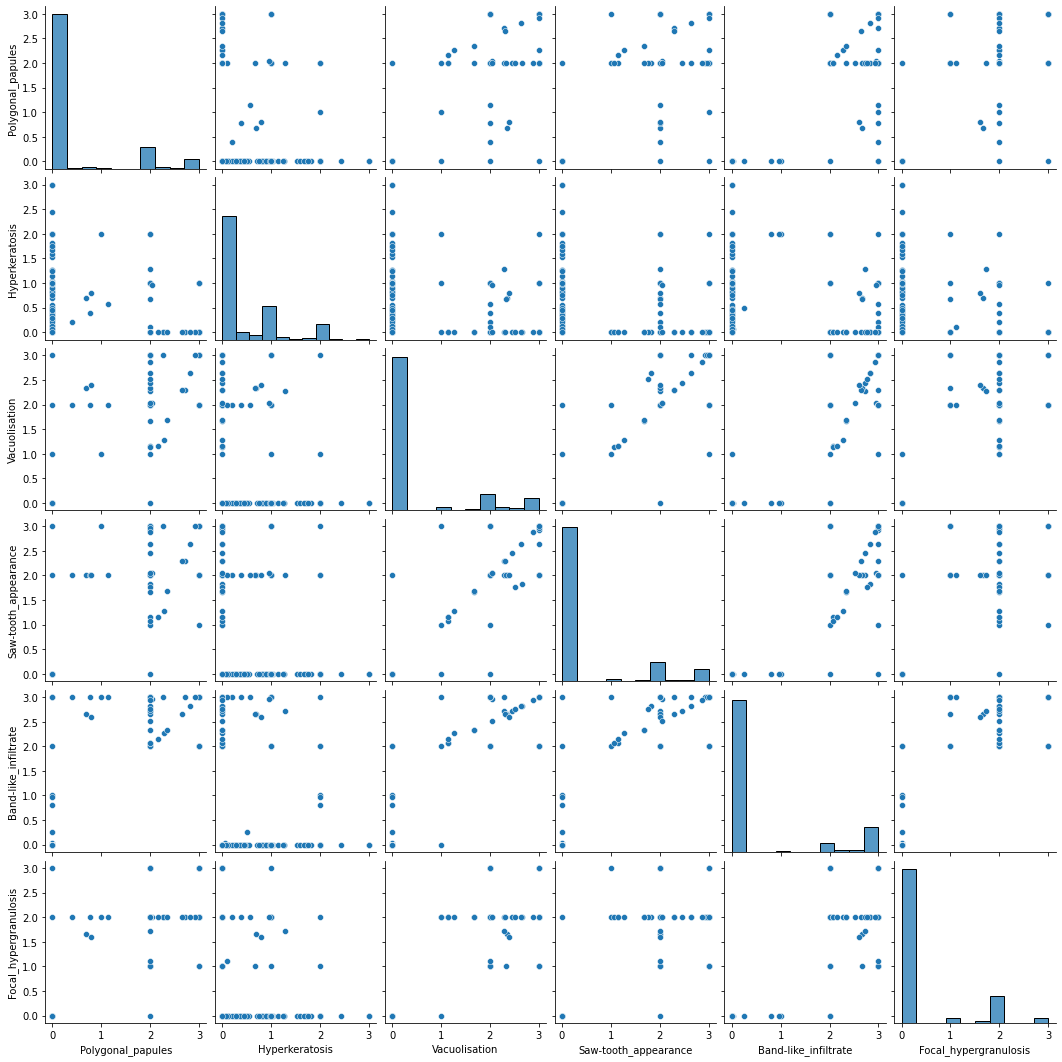

In [11]:
sea.pairplot(data_trn.loc[:,["Polygonal_papules", "Hyperkeratosis","Vacuolisation",
                             "Saw-tooth_appearance","Band-like_infiltrate","Focal_hypergranulosis"]])

##### Separo datos para entrenamiento y validación

80% de los patrones para entrenamiento y 20% para validación.

In [20]:
X_trn, X_val, y_trn, y_val = train_test_split(X_TRN, Y_TRN, test_size=.2)

Relleno valores faltantes con la media de cada feature

**NOTA**: Esto estaba implementado en la entrega anterior.

In [23]:
for faltante in faltantes:
    X_trn[faltante[0]].fillna(int(X_trn[faltante[0]].mean()), inplace=True)
    X_val[faltante[0]].fillna(int(X_val[faltante[0]].mean()), inplace=True)

In [24]:
#---------------------
# Analizando datos
#---------------------

#Chequeo variables faltantes en mis datos de entrenamiento
faltantesX_trn  = [(faltante,X_trn[faltante].isna().sum()) for faltante in X_TRN if X_TRN[faltante].isnull().sum()]
faltantesX_val  = [(faltante,X_val[faltante].isna().sum()) for faltante in X_TRN if X_TRN[faltante].isnull().sum()]
print("Datos faltantes de Xtrain, ",faltantesX_trn)
print("Datos faltantes de Xval, ",faltantesX_val)

Datos faltantes de Xtrain,  [('Erythema', 0), ('Oral_mucosal', 0), ('Melanin_incontinence', 0)]
Datos faltantes de Xval,  [('Erythema', 0), ('Oral_mucosal', 0), ('Melanin_incontinence', 0)]


### Normalizando datos

In [25]:
from sklearn.preprocessing import MinMaxScaler

X_trn = MinMaxScaler().fit_transform(X_trn)
X_val = MinMaxScaler().fit_transform(X_val)
X_tst = MinMaxScaler().fit_transform(X_tst)

## Proyección de los datos y visualización

- Utilice PCA y obtenga las componentes principales para este dataset utilizando PCA y LDA.
- ¿Qué porcentaje de la varianza explican las 2 primeras componentes con cada técnica?.
- Construya un gráfico compuesto por 2 subplots:
  - Subplot 1: Gráfico 2D mostrando la distribución de los datos empleando las 2 componentes más importantes encontradas mediante PCA.
  - Subplot 2: Gráfico 2D mostrando la distribución de los datos empleando las 2 componentes más importantes encontradas mediante LDA.

#### PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [27]:
pca = PCA(n_components = 2)
pca.fit(X_trn)

#proyecto los datos con el PCA
Xtrn_pca = pca.transform(X_trn)
X_val_pca = pca.transform(X_val)
X_tst_pca = pca.transform(X_tst)

##### Gráfica de dispersión y varianza acumulada

Van gráficos en subplots.

**Nota**: Pido disculpas por no implementarlo antes, no pense que era obligatorio.

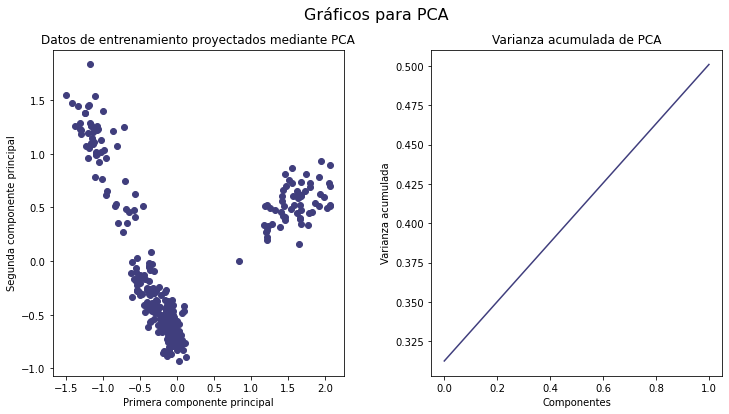

In [28]:
title = "Gráficos para PCA"
fig, plots = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw=dict(hspace=0.45, wspace=0.3))
fig.suptitle(title, fontsize = 16)

#Gráfica dispersión
plots[0].scatter(Xtrn_pca[:,0], Xtrn_pca[:,1], color = "#403e7d")
plots[0].set_xlabel('Primera componente principal')
plots[0].set_ylabel('Segunda componente principal')
plots[0].set_title('Datos de entrenamiento proyectados mediante PCA')
#plots[0].xaxis.grid(True)
#plots[0].legend()

#Gráfica de varianza acumulada
plots[1].plot(np.cumsum(pca.explained_variance_ratio_), color = "#403e7d")
plots[1].set_xlabel('Componentes')
plots[1].set_ylabel('Varianza acumulada')
plots[1].set_title('Varianza acumulada de PCA')

plt.show()

#### LDA

##### Gráfica de dispersión y varianza acumulada

In [29]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X_trn, y_trn)

#proyecto los datos con el PCA
Xtrn_lda = lda.transform(X_trn)
X_val_lda = lda.transform(X_val)
X_tst_lda = lda.transform(X_tst)

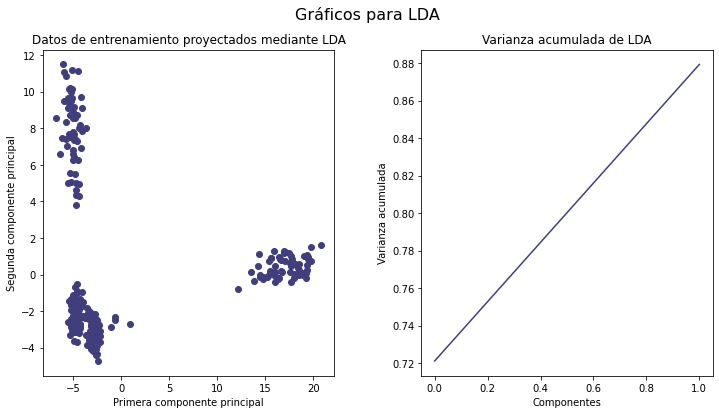

In [30]:
title = "Gráficos para LDA"
fig, plots = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw=dict(hspace=0.45, wspace=0.3))
fig.suptitle(title, fontsize = 16)

#Gráfica dispersión
plots[0].scatter(Xtrn_lda[:,0], Xtrn_lda[:,1], color = "#403e7d")
plots[0].set_xlabel('Primera componente principal')
plots[0].set_ylabel('Segunda componente principal')
plots[0].set_title("Datos de entrenamiento proyectados mediante LDA")
#plots[0].xaxis.grid(True)
#plots[0].legend()

#Gráfica de varianza acumulada
plots[1].plot(np.cumsum(lda.explained_variance_ratio_), color = "#403e7d")
plots[1].set_xlabel('Componentes')
plots[1].set_ylabel('Varianza acumulada')
plots[1].set_title('Varianza acumulada de LDA')

plt.show()

### Estructura para guardar métricas

In [31]:
METRICAS = {'modelo': {'trn': {'Pr': None, 'Rc': None, 'Acc': None, 'F1':None},
                       'val': {'Pr': None, 'Rc': None, 'Acc': None, 'F1':None},
                       'tst': {'Pr': None, 'Rc': None, 'Acc': None, 'F1':None}},
            'modelo+pca': {'trn': {'Pr': None, 'Rc': None, 'Acc': None, 'F1':None},
                           'val': {'Pr': None, 'Rc': None, 'Acc': None, 'F1':None},
                           'tst': {'Pr': None, 'Rc': None, 'Acc': None, 'F1':None}},
            'modelo+lda': {'trn': {'Pr': None, 'Rc': None, 'Acc': None, 'F1':None},
                           'val': {'Pr': None, 'Rc': None, 'Acc': None, 'F1':None},
                           'tst': {'Pr': None, 'Rc': None, 'Acc': None, 'F1':None}}}

### Clasificador

Se propone un SVM

In [32]:
# SVM
from sklearn.svm import SVC #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.metrics import accuracy_score

In [33]:
modelo = SVC(C = 9e-1, kernel = "rbf", gamma = 1e-1)

model_full = deepcopy(modelo)
model_pca = deepcopy(modelo)
model_lda = deepcopy(modelo)

#### Entrenamiento del modelo con todas las features

In [34]:
model_full.fit(X_trn, y_trn)

SVC(C=0.9, gamma=0.1)

#### Predicciones

In [35]:
#predicciones modelo completo
y_pred = model_full.predict(X_trn)

#### Cálculo de métricas utilizando el modelo completo con todas las features

In [36]:
# Cálculo de métricas para modelo completo
precision, recall, f1,_ = precision_recall_fscore_support(y_trn, y_pred, average='macro')
accuracy = accuracy_score(y_trn, y_pred)

# Guardo métricas
METRICAS['modelo']['trn']['Pr'] = precision
METRICAS['modelo']['trn']['Rc'] = recall
METRICAS['modelo']['trn']['Acc'] = accuracy
METRICAS['modelo']['trn']['F1'] = f1

##### Predicciones modelo completo sobre datos de validación

In [37]:
y_pred = model_full.predict(X_val)

# Cálculo de métricas
precision, recall, f1,_ = precision_recall_fscore_support(y_val, y_pred, average='macro')
accuracy = accuracy_score(y_val, y_pred)

# Guardo métricas
METRICAS['modelo']['val']['Pr'] = precision
METRICAS['modelo']['val']['Rc'] = recall
METRICAS['modelo']['val']['Acc'] = accuracy
METRICAS['modelo']['val']['F1'] = f1

##### Predicciones modelo completo sobre datos de test

In [38]:
#predicciones modelo completo sobre datos de test
y_pred = model_full.predict(X_tst)

# Cálculo de métricas
precision, recall, f1,_ = precision_recall_fscore_support(y_tst, y_pred, average='macro')
accuracy = accuracy_score(y_tst, y_pred)

# Guardo métricas
METRICAS['modelo']['tst']['Pr'] = precision
METRICAS['modelo']['tst']['Rc'] = recall
METRICAS['modelo']['tst']['Acc'] = accuracy
METRICAS['modelo']['tst']['F1'] = f1

### PCA y validación

In [39]:
model_pca.fit(Xtrn_pca, y_trn)

SVC(C=0.9, gamma=0.1)

##### Predicciones del modelo + PCA sobre datos de entrenamiento

In [42]:
#predicciones del modelo usando PCA
y_pred = model_pca.predict(Xtrn_pca)

# Calculo las métricas
precision, recall, f1,_ = precision_recall_fscore_support(y_trn, y_pred, average='macro')
accuracy = accuracy_score(y_trn, y_pred)

# Guardo las métricas
METRICAS['modelo+pca']['trn']['Pr'] = precision
METRICAS['modelo+pca']['trn']['Rc'] = recall
METRICAS['modelo+pca']['trn']['Acc'] = accuracy
METRICAS['modelo+pca']['trn']['F1'] = f1

C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Predicciones del modelo + PCA sobre datos de validación

In [43]:
#predicciones modelo + PCA sobre datos de validación
y_pred = model_pca.predict(X_val_pca)

# Cálculo de métricas
precision, recall, f1,_ = precision_recall_fscore_support(y_val, y_pred, average='macro')
accuracy = accuracy_score(y_val, y_pred)

# Guardo métricas
METRICAS['modelo+pca']['val']['Pr'] = precision
METRICAS['modelo+pca']['val']['Rc'] = recall
METRICAS['modelo+pca']['val']['Acc'] = accuracy
METRICAS['modelo+pca']['val']['F1'] = f1

C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Predicciones modelo + PCA sobre datos de test

In [44]:
#predicciones modelo + PCA sobre datos de test
y_pred = model_pca.predict(X_tst_pca)

# Cálculo de métricas
precision, recall, f1,_ = precision_recall_fscore_support(y_tst, y_pred, average='macro')
accuracy = accuracy_score(y_tst, y_pred)

# Guardo métricas
METRICAS['modelo+pca']['tst']['Pr'] = precision
METRICAS['modelo+pca']['tst']['Rc'] = recall
METRICAS['modelo+pca']['tst']['Acc'] = accuracy
METRICAS['modelo+pca']['tst']['F1'] = f1

C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LDA

In [45]:
model_pca.fit(Xtrn_lda, y_trn)

SVC(C=0.9, gamma=0.1)

##### Predicciones del modelo usando PCA

In [46]:
#predicciones del modelo usando PCA
y_pred = model_pca.predict(Xtrn_lda)

# Calculo las métricas
precision, recall, f1,_ = precision_recall_fscore_support(y_trn, y_pred, average='macro')
accuracy = accuracy_score(y_trn, y_pred)

# Guardo las métricas
METRICAS['modelo+lda']['trn']['Pr'] = precision
METRICAS['modelo+lda']['trn']['Rc'] = recall
METRICAS['modelo+lda']['trn']['Acc'] = accuracy
METRICAS['modelo+lda']['trn']['F1'] = f1

##### Predicciones modelo + LDA sobre datos de validación

In [47]:
#predicciones modelo + LDA sobre datos de validación
y_pred = model_pca.predict(X_val_lda)

# Cálculo de métricas
precision, recall, f1,_ = precision_recall_fscore_support(y_val, y_pred, average='macro')
accuracy = accuracy_score(y_val, y_pred)

# Guardo métricas
METRICAS['modelo+lda']['val']['Pr'] = precision
METRICAS['modelo+lda']['val']['Rc'] = recall
METRICAS['modelo+lda']['val']['Acc'] = accuracy
METRICAS['modelo+lda']['val']['F1'] = f1

##### Predicciones modelo + PCA sobre datos de test

In [48]:
#predicciones modelo + PCA sobre datos de test
y_pred = model_pca.predict(X_tst_lda)

# Cálculo de métricas
precision, recall, f1,_ = precision_recall_fscore_support(y_tst, y_pred, average='macro')
accuracy = accuracy_score(y_tst, y_pred)

# Guardo métricas
METRICAS['modelo+lda']['tst']['Pr'] = precision
METRICAS['modelo+lda']['tst']['Rc'] = recall
METRICAS['modelo+lda']['tst']['Acc'] = accuracy
METRICAS['modelo+lda']['tst']['F1'] = f1

### Resultados comparativos

#### Sobre train

In [49]:
# Resultados comparativos
print('\n------------------------------------------')
print(':::                TRAIN               :::')
print('------------------------------------------')
print('Features    Precision  Recall   Acc     F1')

m1 = METRICAS['modelo']['trn']
print(f"Full        {m1['Pr']:.4}     {m1['Rc']:.4}   {m1['Acc']:.4}  {m1['F1']:.4}")
m2 = METRICAS['modelo+pca']['trn']
print(f"PCA         {m2['Pr']:.4}     {m2['Rc']:.4}   {m2['Acc']:.4}  {m2['F1']:.4}")
m3 = METRICAS['modelo+lda']['trn']
print(f"LDA         {m3['Pr']:.4}     {m3['Rc']:.4}   {m3['Acc']:.4}  {m3['F1']:.4}")


------------------------------------------
:::                TRAIN               :::
------------------------------------------
Features    Precision  Recall   Acc     F1
Full        0.9871     0.9873   0.987  0.9871
PCA         0.6671     0.749   0.7532  0.6929
LDA         0.838     0.8314   0.8279  0.8258


#### Sobre validation

In [50]:
print('\n-----------------------------------------------')
print(':::               VALIDATION                :::')
print('-----------------------------------------------')
print('Features    Precision  Recall   Acc     F1')

m1 = METRICAS['modelo']['val']
print(f"Full        {m1['Pr']:.4}     {m1['Rc']:.4}   {m1['Acc']:.4}  {m1['F1']:.4}")
m2 = METRICAS['modelo+pca']['val']
print(f"PCA         {m2['Pr']:.4}     {m2['Rc']:.4}   {m2['Acc']:.4}  {m2['F1']:.4}")
m3 = METRICAS['modelo+lda']['val']
print(f"LDA         {m3['Pr']:.4}     {m3['Rc']:.4}   {m3['Acc']:.4}  {m3['F1']:.4}")


-----------------------------------------------
:::               VALIDATION                :::
-----------------------------------------------
Features    Precision  Recall   Acc     F1
Full        0.9589     0.9611   0.961  0.9596
PCA         0.6659     0.7603   0.7403  0.6876
LDA         0.8575     0.8536   0.8571  0.8545


#### Sobre test

<span style="color:#C70039"> _*Falta Sección de evaluación en test._</span>

In [51]:
print('\n-----------------------------------------------')
print(':::               TEST                    :::')
print('-----------------------------------------------')
print('Features    Precision  Recall   Acc     F1')

measures = METRICAS['modelo']['tst']
print(f"Full        {measures['Pr']:.4}     {measures['Rc']:.4}   {measures['Acc']:.4}  {measures['F1']:.4}")
measures = METRICAS['modelo+pca']['tst']
print(f"PCA         {measures['Pr']:.4}     {measures['Rc']:.4}   {measures['Acc']:.4}  {measures['F1']:.4}")
measures = METRICAS['modelo+lda']['tst']
print(f"LDA         {measures['Pr']:.4}     {measures['Rc']:.4}   {measures['Acc']:.4}  {measures['F1']:.4}")


-----------------------------------------------
:::               TEST                    :::
-----------------------------------------------
Features    Precision  Recall   Acc     F1
Full        0.9511     0.9511   0.9615  0.9511
PCA         0.6513     0.7244   0.7981  0.6748
LDA         0.9151     0.8978   0.9135  0.8891


<span style="color:#C70039"> _*Se debe justificar qué modelo/features usaría y el por qué de la elección._</span>

### Seleción de modelo/feature

Utilizaría el SVM junto al LDA. En primer lugar, la técnica de LDA nos permite encontrar nuevos subespacios que intentan maximizar la separabilidad entre clases, lo cual podría facilitar el trabajo del SVM para clasificar. Por otro lado, LDA tiene en cuenta los labels de cada clase, mientras que PCA no.

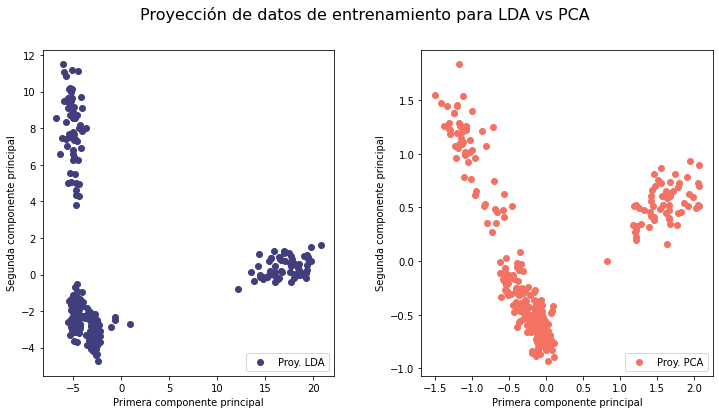

In [52]:
title = "Proyección de datos de entrenamiento para LDA vs PCA "
fig, plots = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw=dict(hspace=0.45, wspace=0.3))
fig.suptitle(title, fontsize = 16)

#Gráfica dispersión
plots[0].scatter(Xtrn_lda[:,0], Xtrn_lda[:,1], color = "#403e7d", label = "Proy. LDA")
plots[0].set_xlabel('Primera componente principal')
plots[0].set_ylabel('Segunda componente principal')
#plots[0].set_title("Datos de entrenamiento proyectados mediante LDA")
plots[0].legend(loc = 4)

#Gráfica de varianza acumulada
plots[1].scatter(Xtrn_pca[:,0], Xtrn_pca[:,1], color = "#f37263", label = "Proy. PCA")
plots[1].set_xlabel('Primera componente principal')
plots[1].set_ylabel('Segunda componente principal')
#plots[1].set_title("Datos de entrenamiento proyectados mediante PCA")
plots[1].legend(loc = 4)

plt.show()

**Comentario:** No se como sacar los _Warnings_ cuando realizo las predicciones.

**Comentario:** Habiendo normalizado los datos, la proyección de los datos y la posterior clasificación mejora sustancialmente, gracias por la observación.